## first let's read data from file

In [210]:
f = open("bayg29.tsp")
m = f.read()
m = m.split("\n")
data = [[0 for _ in range(29)] for _ in range(29)]
for i in range(0,29):
    data[i] = m[i+8].split()

## with available data, we make the adjacency matrix which store the distance of two city i,j in mat[i][j]

In [211]:
mat = [[0 for _ in range(29)] for _ in range(29)]
for i in range(0,28):
    mat[i][i+1::] = data[i][0::]
for i in range (0,29):
    for j in range (0,29):
        if(mat[i][j]==0):
            mat[i][j]=mat[j][i]

## make our generation with population 1000 of random  permutation arrays of numbers 0 to 28

In [212]:
import more_itertools as mit
random_size = 1000
def population(random_size):
    iterable = range(29)
    random_population = []
    for i in range(random_size): 
        random_population.append(tuple(mit.random_permutation(iterable)))
    return random_population

## here is definition of fitness function where calculate the circle weight

In [213]:
def fitness(random_population):
    weight = 0
    weight_population = []
    for i in random_population:
        for j in range(28):
            weight += int(mat[i[j]][i[j+1]])
        weight+=int(mat[i[0]][i[28]])
        weight_population.append(weight)
        weight = 0
    return weight_population

## now we sort society based on fitness function

In [214]:
import random
def sort_fitness(random_population,weight_population):
    dt = list(zip(random_population,weight_population))
    res = sorted(dt, key = lambda x: x[1])
    dt = list(zip(*res))
    random_population , weight_population  = dt[0] , dt[1]
    return random_population

## after sorting,  we choose parents from our society. the parameter for choosing parents is 0.6. it means 60% of the  chromosomes selected as parents. this value tested many times and set since it has the best result among other parameters.
### 50% of parent chromosomes selected from the best chromosomes.
### 35% of parents selected from second 25% of society.
### 10% of parents selected from third 25% of society.
### 5% of parents selected from last 25% of society.
### we select best sample on each level and replace them with parents

In [215]:
import random
def choose_parents(random_population,weight_population):
    global p
    p = 0.6
    len_pop = len(random_population)
    global parents_size
    parents_size = int(p * random_size)
    parents_sample = []
    random_population = list(random_population)
    parents_sample +=random.sample(random_population[0:1],1)
    parents_sample += random.sample(random_population[0:len_pop//2],int(parents_size*50/100))
    parents_sample += random.sample(random_population[len_pop//4:len_pop//2],int(parents_size*35/100))
    parents_sample += random.sample(random_population[len_pop//2:3*len_pop//4],int(parents_size*10/100))
    parents_sample += random.sample(random_population[3*len_pop//4:len_pop],int(parents_size*5/100)-1)   
    return parents_sample


## after chromosomes selecting we start producing children with order recombination method
### next, make parents of 1.2 parents population. since 1.2 selected as the best parameter for this section.
### first choose 2 sample out of parents as father and mother.
### next choose 2 random number and transfer all numbers between them to child. then fill other number of child with mother

In [221]:
from random import randint
def choose_children(parents_sample):
    global c 
    c = 1.2
    global child_size 
    child_size = int(c * len(parents_sample))
    children = []
    for i in range(child_size):
        random_child = random.sample(parents_sample,2)
        mother = random_child[1]
        father = random_child[0]
        child = [0 for _ in range(29)]
        f_number = randint(0, 28)
        s_number = randint(0, 28)
        s = min(f_number,s_number)
        if s==f_number:
            e = s_number
        elif s==s_number:
            e = f_number
        child[s:e] = father[s:e]
        index_m = e
        index_c = e
        while(child.count(0)>1):
            if(mother[index_m] not in child):
                child[index_c] = mother[index_m]
                index_m = (index_m+1)%29
                index_c = (index_c+1)%29
            else:
                index_m = (index_m+1)%29
        children.append(child)
    return children

## now mutate 10% of children. how? first select 4random indexes. then change the numbers of that indexes.

In [222]:
import random
from random import randint
def mutation(children):
    for i in range(0,child_size,10):
        X = randint(0, 27)
        Y = randint(0, 27)
        Z = randint(0, 27)
        W = randint(0, 27)
        temp1, temp2= childre[i][X],childre[i][Y]
        childre[i][X],childre[i][Y]= childre[i][(X+Z)%29],childre[i][(Y+W)%29]
        childre[i][X],childre[i][Y] = temp1 , temp2
    return children
        

## after children mutation we should upgrade our first generation. from tail of our array (which has the worst fitnesses) we split by the number of children and replace them 

In [223]:
 def update_population(random_population,children):
    len_c = len(children)
    len_p = len(random_population)
    random_population = list(random_population)
    random_population[len_p-len_c:len_p] = list(children)
    random_population = tuple(random_population)
    return random_population

## now we run our program.
## we need just 150 generation and then print the best circle

In [224]:
pop = population(random_size)
min_weight = []
mean_weight = []
for i in range(150):
    weight = fitness(pop)
    pop = tuple(sort_fitness(pop,weight))
    parent = choose_parents(pop,weight)
    childre = choose_children(parent)
    childre = mutation(childre)
    new_pop = update_population(pop,childre)
    new_weight = fitness(new_pop)
    pop = new_pop
    min_weight.append(min(new_weight))
    mean_weight.append(int(sum(new_weight)/len(new_weight)))
    

Best cycle:  [18, 14, 10, 21, 16, 13, 17, 3, 9, 19, 1, 20, 4, 28, 2, 25, 8, 11, 5, 27, 0, 7, 23, 12, 15, 26, 22, 6, 24]
fitness of best cycle:  1630


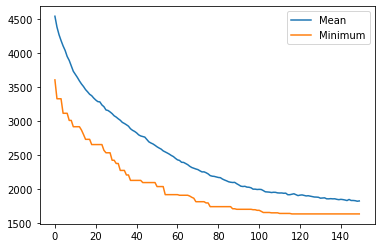

In [225]:
import pandas as pd
import matplotlib as plt
data_fram = pd.DataFrame({'Mean':mean_weight, 'Minimum':min_weight})
data_fram.plot()
print("Best cycle: ", pop[0])
print("fitness of best cycle: ", min_weight[-1])